In [1]:
%matplotlib inline
from __future__ import division
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import common
import notebook_helpers

FS = (10, 7)

om = notebook_helpers.get_frame()
lyr = notebook_helpers.get_frame(having_lyrics=True)

In [2]:
print "Loaded {:,} songs, of which {:.1%} are scraped".format(
    len(om), om['scraped'].mean()
)

genred = om[~om['genre'].isnull()]
print "{:,} songs have a genre label ({:.1%}). {:,} are scraped and have genre".format(
    len(genred), len(genred)/len(om), genred['scraped'].sum()
)

Loaded 27,519 songs, of which 53.6% are scraped
6,434 songs have a genre label (23.4%). 4,749 are scraped and have genre


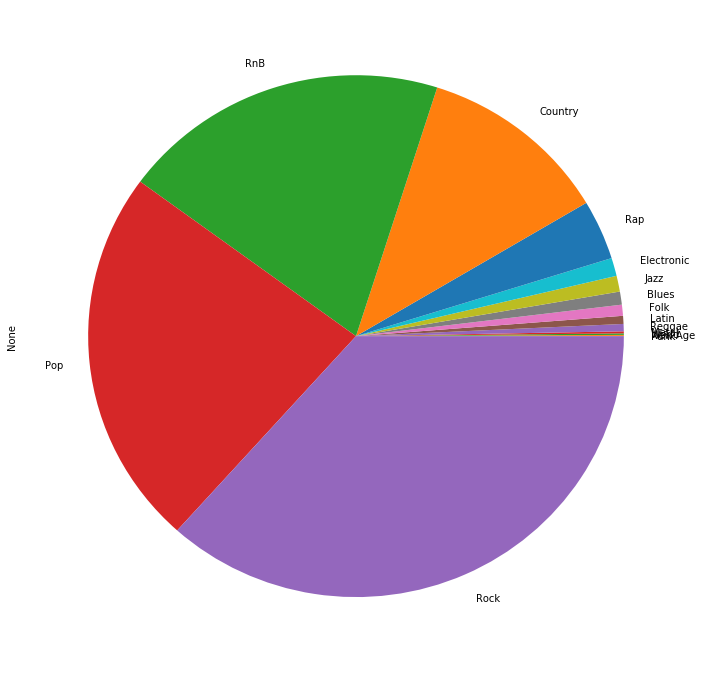

In [3]:
ax = genred.groupby('genre').size().sort_values().plot.pie(figsize=(12,12))

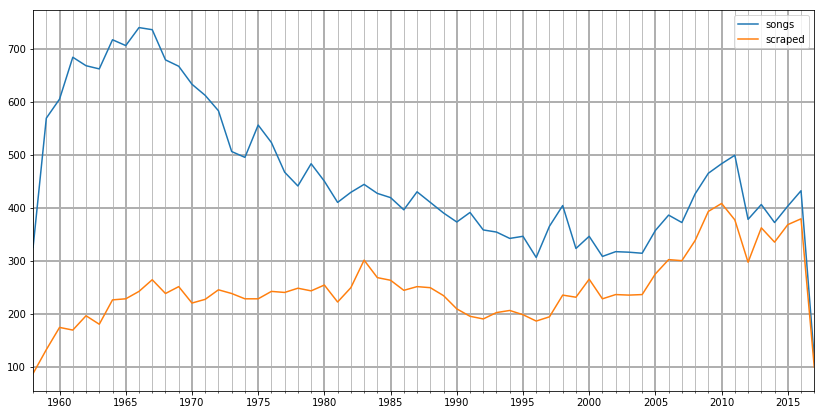

In [4]:
songs_per_year = om.groupby('year').size()
scraped_per_year = lyr.groupby('year').size()
fig, ax = plt.subplots(figsize=(14, 7))
yrs = songs_per_year.index
ax.plot(songs_per_year.index, songs_per_year.values, label='songs')
ax.plot(scraped_per_year.index, scraped_per_year.values, label='scraped')
ax.set_xticks([yr for yr in songs_per_year.index if yr%5 == 0], minor=0);
ax.set_xticks(songs_per_year.index, minor=1);
ax.grid(which='minor');
ax.grid(which='major', lw=2);
ax.set_xlim(yrs.min(), yrs.max());
ax.legend();

6 outliers fall outside the histogram (0 ratios < min=0, 6 ratios > max=9)


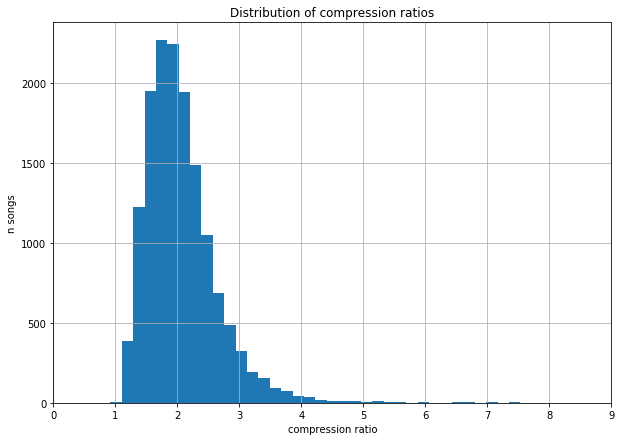

In [14]:
#ax = lyr['ratio'].plot.hist(figsize=FS)
xmax = 9
xmin = 0
nbins = 50
ax = lyr['ratio'].hist(bins=np.linspace(xmin,xmax,nbins), figsize=FS)
toosmall = (lyr['ratio'] < xmin).sum()
toobig = (lyr['ratio'] > xmax).sum()
print "{} outliers fall outside the histogram ({} ratios < min={}, {} ratios > max={})".format(
    toosmall+toobig, toosmall, xmin, toobig, xmax
)
ax.set_xlim(xmin, xmax);
ax.set_xlabel('compression ratio')
ax.set_ylabel('n songs');
ax.set_title('Distribution of compression ratios');

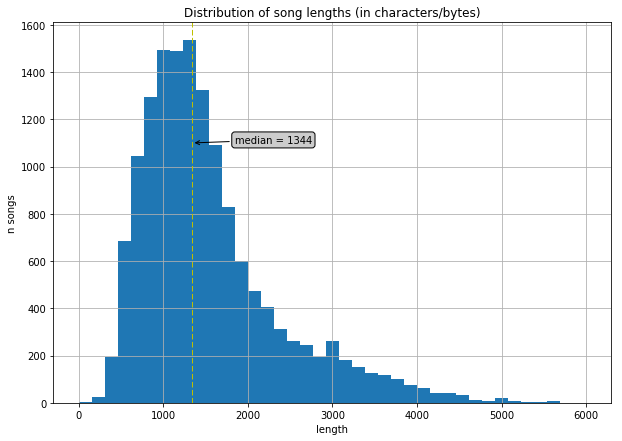

In [6]:
from matplotlib.transforms import blended_transform_factory as btf
xmin = 0
xmax = 6000
nbins = 40
ax = lyr['raw'].hist(figsize=FS, bins=np.linspace(xmin, xmax, nbins))
med = lyr['raw'].median()
ax.vlines([med], 0, 1, transform=btf(ax.transData, ax.transAxes), 
          colors='y', label='median', lw=1, linestyle='--')
ylab = 1100
ax.annotate('median = {:.0f}'.format(med), 
            bbox=dict(boxstyle="round", fc="0.8"),
            arrowprops=dict(arrowstyle="->"),
            xy=(med, ylab), xytext=(med+500, ylab)
)
ax.set_title('Distribution of song lengths (in characters/bytes)')
ax.set_ylabel('n songs')
ax.set_xlabel('length');

In [17]:
n = 10
print "Most repetitive songs"
cols = ['artist', 'title', 'date', 'raw', 'comp', 'rscore', 'ratio', 'raw_ratio', 'unbiased_ratio']
lyr[cols].sort_values(by='ratio', ascending=0).head(n)

Most repetitive songs


,artist,title,date,raw,comp,rscore,ratio,raw_ratio,unbiased_ratio
25397,Daft Punk,Around The World,1997-08-30,2610.0,74.0,3.756232,42.786885,35.270270,47.454545
4134,Fatboy Slim,The Rockafeller Skank,1998-08-08,3382.0,171.0,2.967167,19.436782,19.777778,22.250000
15073,Jimmy Smith,Chain Of Fools (Part 1),1968-04-06,629.0,62.0,2.572930,13.104167,10.145161,14.627907
24131,Dillon Francis & DJ Snake,Get Low,2015-04-18,1060.0,106.0,2.321633,10.192308,10.000000,12.183908
535,Duck Sauce,Barbra Streisand,2011-05-14,1413.0,158.0,2.242835,9.420000,8.943038,10.165468
27317,Jose Feliciano,Feliz Navidad,2017-01-07,1358.0,155.0,2.223336,9.238095,8.761290,9.985294
6262,The Michael Zager Band,Let's All Chant,1978-03-04,1473.0,175.0,2.096559,8.138122,8.417143,9.442308
3639,KC And The Sunshine Band,Keep It Comin' Love,1977-07-30,1824.0,214.0,2.011619,7.475410,8.523364,9.353846
16661,DJ Snake & Lil Jon,Turn Down For What,2014-01-11,578.0,96.0,2.002865,7.410256,6.020833,7.506494
19801,Ohio Players,Who'd She Coo?,1976-06-26,1110.0,158.0,1.955869,7.070064,7.025316,7.985612


In [18]:
print "Least repetitive songs"
lyr[cols].sort_values(by='ratio', ascending=1).head(n)

Least repetitive songs


,artist,title,date,raw,comp,rscore,ratio,raw_ratio,unbiased_ratio
21100,The Beach Boys,Surfin,1962-02-17,168.0,144.0,0.055060,1.056604,1.166667,1.344000
94,Stacy Lattisaw,Miracles,1983-08-13,546.0,354.0,0.066249,1.068493,1.542373,1.629851
151,Nat King Cole,The Christmas Song (Merry Christmas To You),1960-12-17,609.0,392.0,0.074993,1.077876,1.553571,1.632708
10771,Enigma,Beyond The Invisible,1996-11-30,403.0,265.0,0.099039,1.104110,1.520755,1.638211
14371,James Brown,Say It Loud - I'm Black And I'm Proud (Part 1),1968-09-07,280.0,199.0,0.105361,1.111111,1.407035,1.555556
19028,Ghostface Killah,Cherchez LaGhost,2000-08-05,999.0,619.0,0.106585,1.112472,1.613893,1.665000
1876,David Gates,Sail Around The World,1973-10-20,451.0,292.0,0.107580,1.113580,1.544521,1.652015
17204,Europe,Carrie,1987-08-01,489.0,314.0,0.110144,1.116438,1.557325,1.657627
5918,The Jimi Hendrix Experience,All Along The Watchtower,1968-09-21,718.0,441.0,0.116565,1.123631,1.628118,1.701422
7301,"Crosby, Stills & Nash",Just A Song Before I Go,1977-05-28,433.0,281.0,0.120095,1.127604,1.540925,1.652672


In [9]:
print "Most repetitive songs (raw ratio)"
cols = ['artist', 'title', 'date', 'raw', 'comp', 'ratio', 'raw_ratio']
lyr[cols].sort_values(by='raw_ratio', ascending=0).head(n)

Most repetitive songs (raw ratio)


,artist,title,date,raw,comp,ratio,raw_ratio
25397,Daft Punk,Around The World,1997-08-30,2610.0,74.0,42.786885,35.270270
4134,Fatboy Slim,The Rockafeller Skank,1998-08-08,3382.0,171.0,19.436782,19.777778
15073,Jimmy Smith,Chain Of Fools (Part 1),1968-04-06,629.0,62.0,13.104167,10.145161
24131,Dillon Francis & DJ Snake,Get Low,2015-04-18,1060.0,106.0,10.192308,10.000000
535,Duck Sauce,Barbra Streisand,2011-05-14,1413.0,158.0,9.420000,8.943038
27317,Jose Feliciano,Feliz Navidad,2017-01-07,1358.0,155.0,9.238095,8.761290
3639,KC And The Sunshine Band,Keep It Comin' Love,1977-07-30,1824.0,214.0,7.475410,8.523364
6262,The Michael Zager Band,Let's All Chant,1978-03-04,1473.0,175.0,8.138122,8.417143
9682,Technotronic,Pump Up The Jam,1989-10-14,2714.0,323.0,6.768080,8.402477
9509,Silento,Watch Me,2015-03-14,2510.0,310.0,7.050562,8.096774


In [10]:
lyr[cols].sort_values(by='raw_ratio', ascending=1).head(n)

,artist,title,date,raw,comp,ratio,raw_ratio
6092,The Surfaris,Wipe Out,1963-06-22,20.0,35.0,1.176471,0.571429
21100,The Beach Boys,Surfin,1962-02-17,168.0,144.0,1.056604,1.166667
21704,The Yardbirds,I'm A Man,1965-10-30,249.0,183.0,1.185714,1.360656
14371,James Brown,Say It Loud - I'm Black And I'm Proud (Part 1),1968-09-07,280.0,199.0,1.111111,1.407035
907,Chicago,Lowdown,1971-05-08,343.0,233.0,1.128289,1.472103
7809,Barbra Streisand,Funny Girl,1964-09-12,391.0,263.0,1.130058,1.486692
312,Al Jarreau,Moonlighting (Theme),1987-05-30,285.0,191.0,1.187500,1.492147
23296,Talk Talk,Life's What You Make It,1986-02-01,194.0,130.0,1.416058,1.492308
4577,Perry Como,Tomboy,1959-02-28,439.0,292.0,1.131443,1.503425
1651,David Sanborn,Bang Bang,1992-08-29,133.0,88.0,1.773333,1.511364


In [11]:
om[om['artist']=='Sia']

,artist,comp,date,peak,ratio,raw,scraped,title,genre,raw_ratio,unbiased_ratio,year,yearf,rscore
1578,Sia,NaN,2015-01-24,17,NaN,NaN,False,Elastic Heart,None,NaN,NaN,2015,2015.149087,NaN
1579,Sia,NaN,2014-05-24,8,NaN,NaN,False,Chandelier,None,NaN,NaN,2014,2014.482420,NaN
1580,Sia,397.0,2017-03-04,71,2.779783,1540.0,True,Helium,None,3.879093,4.074074,2017,2017.260959,1.022373
1581,Sia,544.0,2015-10-17,56,2.795756,2108.0,True,Alive,None,3.875000,4.015238,2015,2015.879909,1.028103


In [12]:
lyr[lyr['artist']=='Sia']

,artist,comp,date,peak,ratio,raw,scraped,title,genre,raw_ratio,unbiased_ratio,year,yearf,rscore
1580,Sia,397.0,2017-03-04,71,2.779783,1540.0,True,Helium,None,3.879093,4.074074,2017,2017.260959,1.022373
1581,Sia,544.0,2015-10-17,56,2.795756,2108.0,True,Alive,None,3.875000,4.015238,2015,2015.879909,1.028103


In [13]:
lyr[lyr['title']=='Chandelier']

,artist,comp,date,peak,ratio,raw,scraped,title,genre,raw_ratio,unbiased_ratio,year,yearf,rscore
